# Understanding the Growing Need for Geriatric Medicine: A Data-Driven Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("hospital data analysis.csv")
df

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


In [45]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Patient_ID        0
Age               0
Gender            0
Condition         0
Procedure         0
Cost              0
Length_of_Stay    0
Readmission       0
Outcome           0
Satisfaction      0
Age_Group         0
dtype: int64


In [46]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [47]:
categorical_cols = ['Gender', 'Condition', 'Procedure', 'Readmission', 'Outcome']
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Gender: ['Female' 'Male']
Unique values in Condition: ['Heart Disease' 'Diabetes' 'Fractured Arm' 'Stroke' 'Cancer'
 'Hypertension' 'Appendicitis' 'Fractured Leg' 'Heart Attack'
 'Allergic Reaction' 'Respiratory Infection' 'Prostate Cancer'
 'Childbirth' 'Kidney Stones' 'Osteoarthritis']
Unique values in Procedure: ['Angioplasty' 'Insulin Therapy' 'X-Ray and Splint'
 'CT Scan and Medication' 'Surgery and Chemotherapy'
 'Medication and Counseling' 'Appendectomy' 'Cast and Physical Therapy'
 'Cardiac Catheterization' 'Epinephrine Injection' 'Antibiotics and Rest'
 'Radiation Therapy' 'Delivery and Postnatal Care' 'Lithotripsy'
 'Physical Therapy and Pain Management']
Unique values in Readmission: ['No' 'Yes']
Unique values in Outcome: ['Recovered' 'Stable']


In [49]:
print("\nDataframe info:\n")
df.info()


Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Patient_ID      984 non-null    int64   
 1   Age             984 non-null    int64   
 2   Gender          984 non-null    object  
 3   Condition       984 non-null    object  
 4   Procedure       984 non-null    object  
 5   Cost            984 non-null    int64   
 6   Length_of_Stay  984 non-null    int64   
 7   Readmission     984 non-null    object  
 8   Outcome         984 non-null    object  
 9   Satisfaction    984 non-null    int64   
 10  Age_Group       984 non-null    category
dtypes: category(1), int64(5), object(5)
memory usage: 78.2+ KB


In [11]:
df.describe()

,Patient_ID,Age,Cost,Length_of_Stay,Satisfaction
count,984.000000,984.000000,984.000000,984.000000,984.000000
mean,500.329268,53.754065,8367.479675,37.663618,3.598577
std,288.979531,14.941135,7761.990976,19.595805,0.883002
min,1.000000,25.000000,100.000000,1.000000,2.000000
25%,250.750000,45.000000,1000.000000,21.000000,3.000000
50%,500.500000,55.000000,6000.000000,38.000000,4.000000
75%,750.250000,65.000000,15000.000000,54.250000,4.000000
max,1000.000000,78.000000,25000.000000,76.000000,5.000000


In [15]:
df[df['Age']>40].sum()

Patient_ID                                                   376004
Age                                                           45467
Gender            FemaleMaleMaleFemaleMaleFemaleFemaleFemaleMale...
Condition         Heart DiseaseDiabetesStrokeCancerHypertensionA...
Procedure         AngioplastyInsulin TherapyCT Scan and Medicati...
Cost                                                        7312000
Length_of_Stay                                                28905
Readmission       NoYesYesNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoYesN...
Outcome           RecoveredStableStableRecoveredStableRecoveredS...
Satisfaction                                                   2485
dtype: object

In [36]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

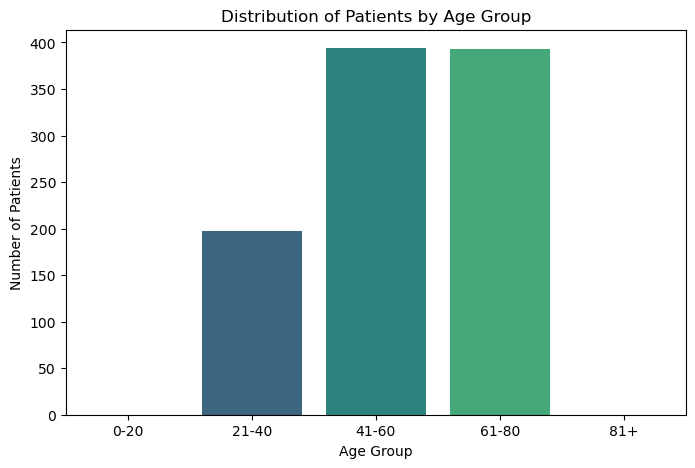

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_Group', palette='viridis')
plt.title('Distribution of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

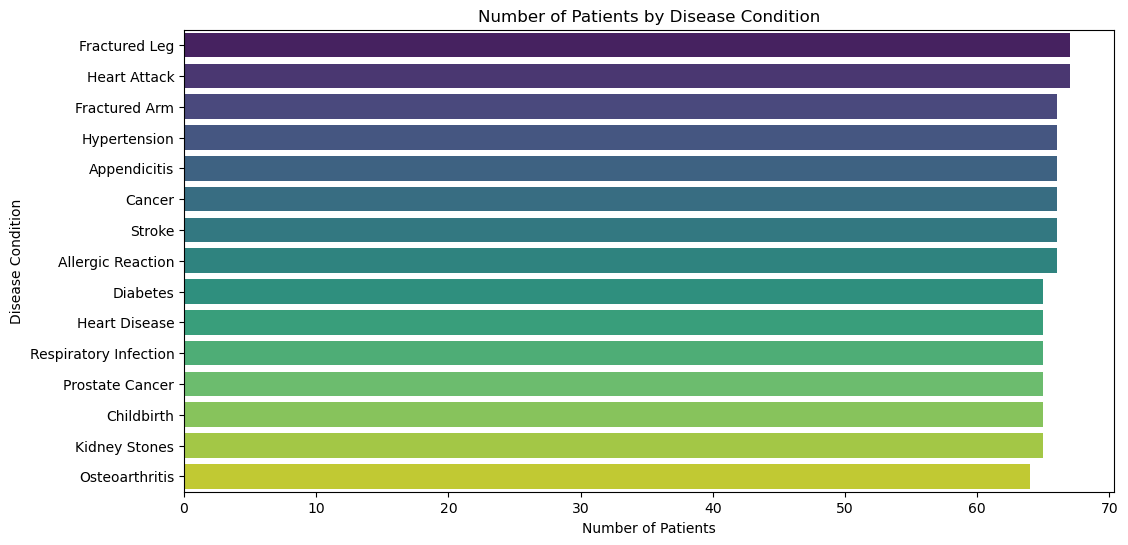

In [38]:
plt.figure(figsize=(12, 6))
disease_counts = df['Condition'].value_counts()
sns.barplot(x=disease_counts.values, y=disease_counts.index, palette='viridis')
plt.title('Number of Patients by Disease Condition')
plt.xlabel('Number of Patients')
plt.ylabel('Disease Condition')
plt.show()

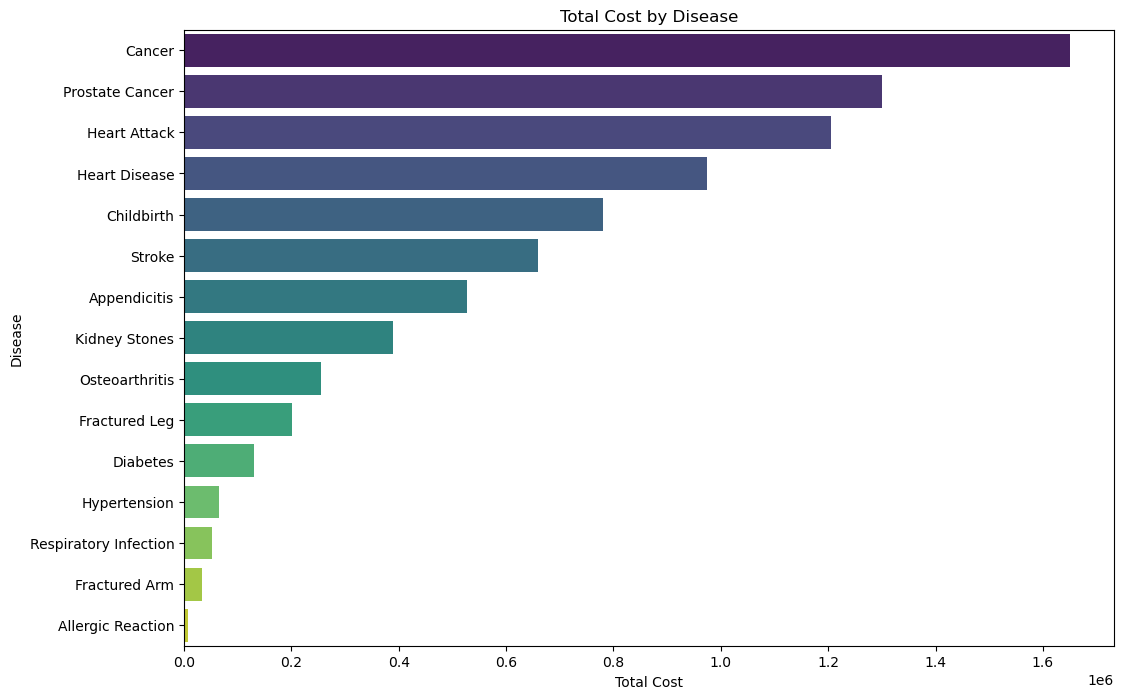

In [39]:
disease_costs = df.groupby('Condition')['Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=disease_costs.values, y=disease_costs.index, palette='viridis')
plt.title('Total Cost by Disease')
plt.xlabel('Total Cost')
plt.ylabel('Disease')
plt.show()

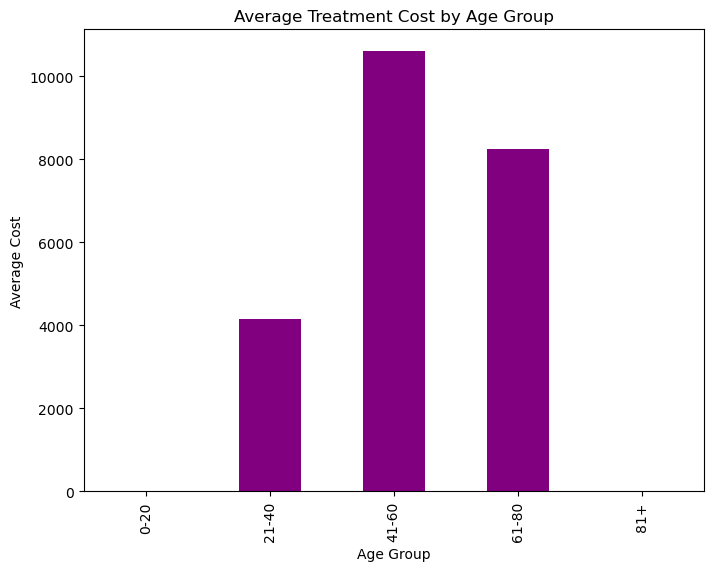

In [40]:
plt.figure(figsize=(8, 6))
avg_cost = df.groupby('Age_Group')['Cost'].mean()
avg_cost.plot(kind='bar', color='purple')
plt.title('Average Treatment Cost by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cost')
plt.show()

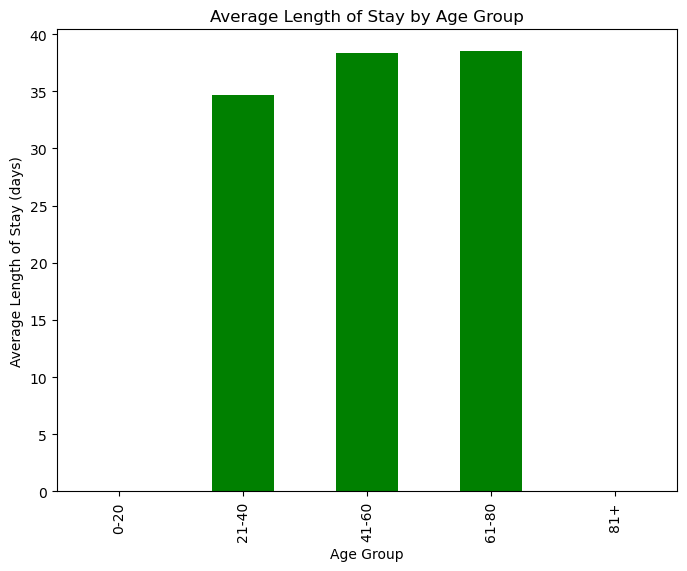

In [41]:
plt.figure(figsize=(8, 6))
avg_stay = df.groupby('Age_Group')['Length_of_Stay'].mean()
avg_stay.plot(kind='bar', color='green')
plt.title('Average Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Length of Stay (days)')
plt.show()

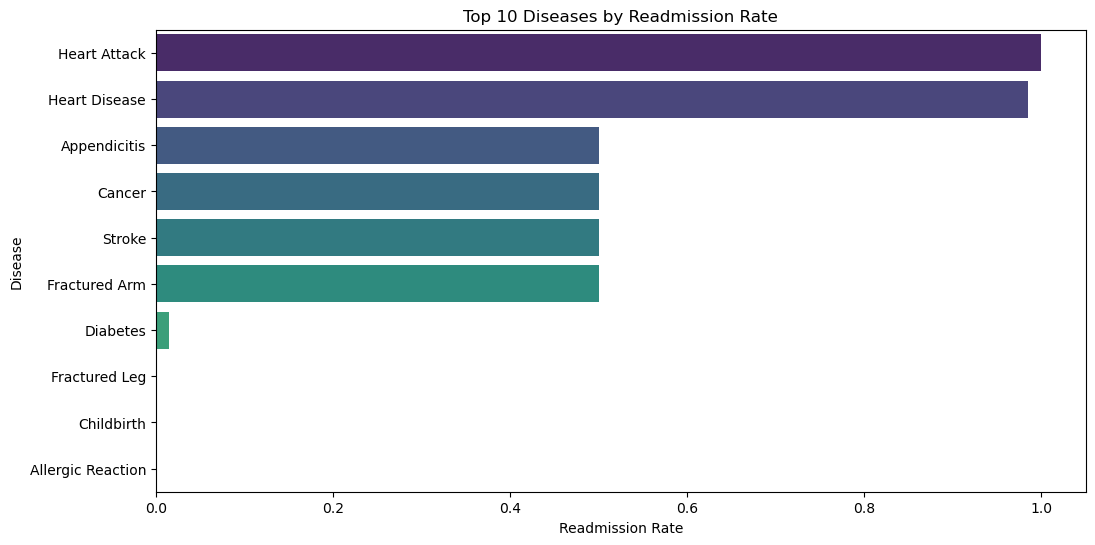

In [43]:
plt.figure(figsize=(12, 6))
readmission_rate = df.groupby('Condition')['Readmission'].apply(lambda x: (x == 'Yes').mean())
readmission_rate = readmission_rate.sort_values(ascending=False).head(10)
sns.barplot(x=readmission_rate.values, y=readmission_rate.index, palette='viridis')
plt.title('Top 10 Diseases by Readmission Rate')
plt.xlabel('Readmission Rate')
plt.ylabel('Disease')
plt.show()

##### The data analysis presents compelling evidence establishing the critical importance of geriatric medicine in contemporary healthcare. 
##### The predominant concentration of patients above 40 years of age, coupled with the high incidence of chronic, age-associated diseases such as 
##### heart disease, diabetes, and stroke, underscore the growing healthcare demands of the aging population. The elevated treatment costs, 
##### longer hospital stays, and significant readmission rates further highlight the complexity and severity of conditions faced by older adults.

##### These results emphatically demonstrate that effective geriatric care is not only essential for improving patient outcomes but also for managing 
##### healthcare resources efficiently. The insights gleaned from this analysis should guide healthcare policymakers and providers to prioritize specialized 
##### geriatric services, foster targeted interventions, and invest in resources that address the multidimensional needs of elderly patients.

##### In conclusion, the increasing burden of age-related illnesses mandates a focused, coordinated approach in healthcare systems, 
##### making geriatric medicine a vital pillar for sustaining health and quality of life in aging societies